In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Script/results_evaluation_genus.csv', sep='\t')
df

,Classifier,tp,fp,fn,ok,no,(tp+fp+fn+ok+no),sens,prec,f1,pearson
0,strex_centrifuge_250000.res,2729742,18004,345022,32232,0,3125000,0.873517,0.993448,0.929631,0.966820
1,strex_centrifuge_25000_SP.res,2795808,18723,278156,32313,0,3125000,0.894659,0.993348,0.941424,0.968537
2,strex_centrifuge_25000_SPZ.res,2947844,85072,59438,32646,0,3125000,0.943310,0.971950,0.957416,0.987198
3,strex_centrifuge_25000_ST.res,2724316,16550,354239,29895,0,3125000,0.871781,0.993962,0.928871,0.985473
4,strex_centrifuge_25000_STZ.res,2930423,104762,59438,30377,0,3125000,0.937735,0.965484,0.951407,0.996809
5,strex_clark_genus_250000.res,2628976,9530,486494,0,0,3125000,0.841272,0.996388,0.912284,0.960236
6,strex_clark_genus_25000_SP.res,2721064,10813,393123,0,0,3125000,0.870740,0.996042,0.929186,0.964553
7,strex_clark_genus_25000_SPZ.res,2950312,77299,97389,0,0,3125000,0.944100,0.974469,0.959044,0.996994
8,strex_clark_genus_25000_ST.res,2655310,11043,458647,0,0,3125000,0.849699,0.995858,0.916991,0.984008
9,strex_clark_genus_25000_STZ.res,2931113,96498,97389,0,0,3125000,0.937956,0.968127,0.952803,0.997026


fn = false negatives

tp = true positives

tn = true negatives

Recall  = tp/all

Precision = (all-fp) / all

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Ste tabelle si fanno assolutamente su Latex.



| Dataset | Tool | Species    | ||   | Genus   | |||
|---:|:--|:-----|:------|:------|:------|:------|:------|:------|:------|
|   | | **Precision**    |**Recall** | **F-m**||  **Precision**  | **Recall**   | **f-m**|
|**all_250000**| centrifuge      | 0.695734     |0.903051    |0.boh|   |  0.988  | 0.629   | 0.762|
|              | centrifuge_SP   | 0.713023     |0.899880    |0.boh|   |  0.988  | 0.629   | 0.762|
|              |**Diff**         | 0.17289      |-0.3171     |0.boh|   |  0.988  | 0.629   | 0.762| 
|              | kraken1         | 0.687426     |0.903602    |0.boh|   |  0.988  | 0.629   | 0.762|
|              | kraken1_SP      | 0.700920     |0.899193    |0.boh|   |  0.988  | 0.629   | 0.762|
|              |**Diff**         | 0.13494      |-0.4409     |0.boh|   |  0.988  | 0.629   | 0.762| 



In [3]:
def ClassifiersPlt(name):
    new_df = df[df["Classifier"].str.contains(name)]    

    x = new_df['Classifier']
    y1 = new_df['sens'] * 100
    y2 = new_df['prec'] * 100
    y3 = new_df['f1'] * 100

    plt.figure(figsize=(20,8))

    #label
    plt.plot(x, y1, color='darkgreen', marker='o', linestyle='dashed',linewidth=2, markersize=15, label='Recall')

    plt.plot(x, y2, color='orange', marker='^', linestyle='dashed',linewidth=2, markersize=15, label='Precision')

    plt.plot(x, y3, color='blue', marker='*', linestyle='dashed',linewidth=2, markersize=15, label='F1')


    plt.ylim(0,101)
    plt.yticks(np.arange(0,101,5))
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.xlabel('Classifiers',fontsize=14)
    plt.ylabel('Evaluation [%]',fontsize=14)
    
    plt.title(name,fontweight='bold',fontsize=20)

In [ ]:
def CompareResults(name, df1, df2, column):
    
    new_df1 = df1[df1["Classifier"].str.contains(name)]  
    new_df2 = df2[df2["Classifier"].str.contains(name)]    

    # both dfs have to correspond with the same classifiers
    x = new_df1['Classifier']
    y1 = new_df1[column] * 100
    y = new_df2[column] * 100

    plt.figure(figsize=(20,8))

    #label
    plt.plot(x, y1, color='darkgreen', marker='o', linestyle='dashed',linewidth=2, markersize=15, label='First data_structure')

    plt.plot(x, y2, color='orange', marker='^', linestyle='dashed',linewidth=2, markersize=15, label='Second data_structure')



    plt.ylim(0,101)
    plt.yticks(np.arange(0,101,5))
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.xlabel('Classifiers',fontsize=14)
    plt.ylabel('Evaluation [%]',fontsize=14)
    
    plt.title(name,fontweight='bold',fontsize=20)
    

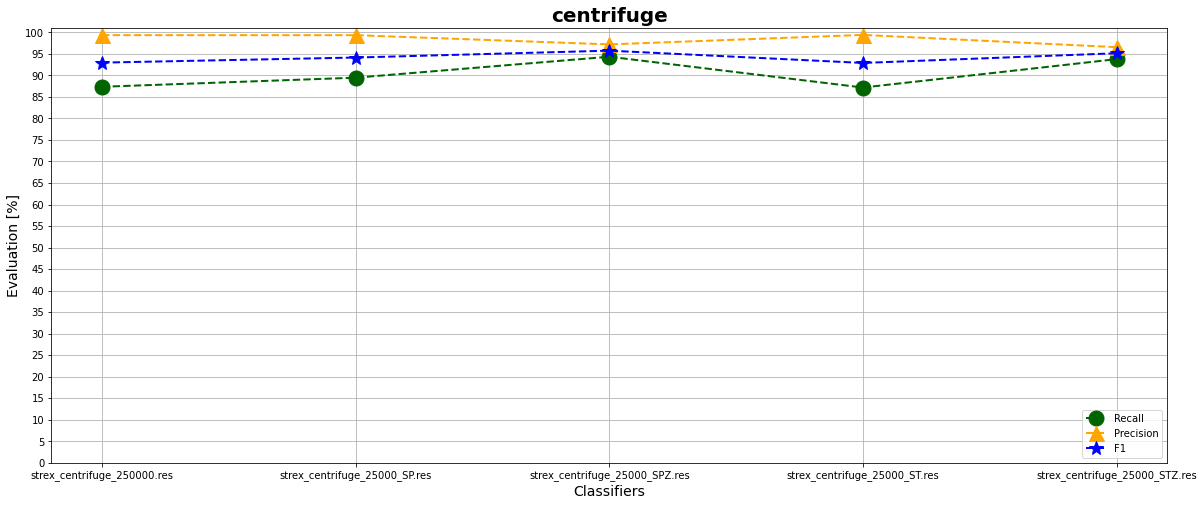

In [4]:
ClassifiersPlt('centrifuge')

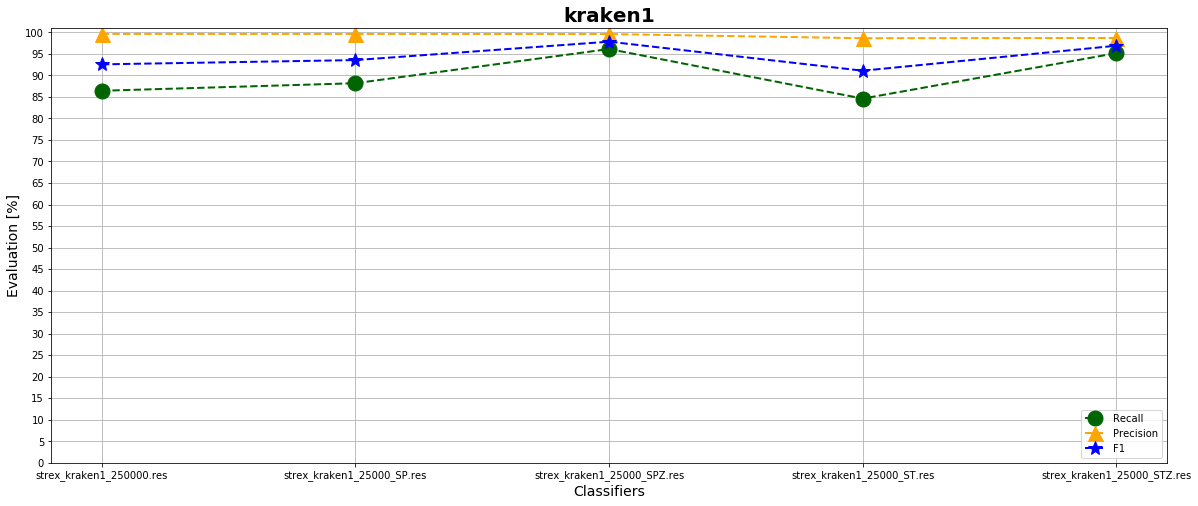

In [11]:
ClassifiersPlt('kraken1')

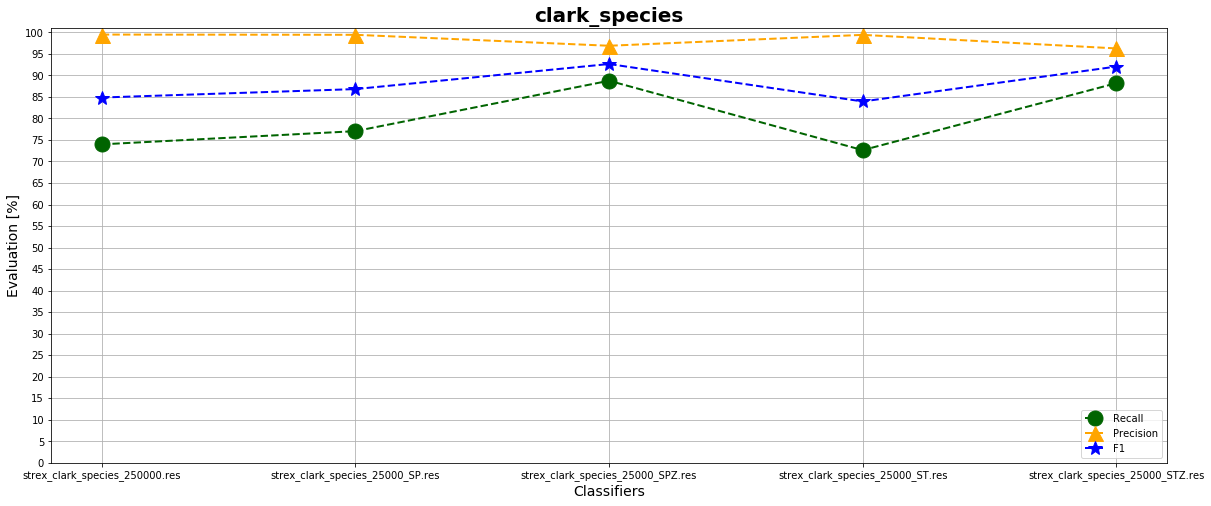

In [12]:
ClassifiersPlt('clark_species')